
# INE PREVISIONES  


### Llibreries i càrrega de dades

In [2]:
"""Libreries que poden ser necessàries"""

# Manejo de datos
import pandas as pd                 # Análisis y manipulación de datos en tablas
import numpy as np                  # Cálculos numéricos y matrices
import os                           # Gestión de rutas de archivos

# Visualización de datos
import matplotlib.pyplot as plt     # Gráficos básicos en 2D
import seaborn as sns               # Gráficos estadísticos mejorados
import plotly.express as px         # Gráficos interactivos simplificados
import plotly.graph_objects as go   # Control avanzado de gráficos en Plotly
import plotly.io as pio             # Interfaz de entrada/salida de Plotly
import squarify                     # Visualización de diagramas de "treemap"
from plottable import Table         # Visualización de tablas
import matplotlib.colors as mcolors # Colores y mapas de colores

# Clustering y agrupamiento
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes


In [3]:
# %pip install plottable
# %pip install kmodes


In [4]:
# Load the CSV files
men_df = pd.read_csv("../Data/INE/INE hombres - Hombres.csv", index_col=0)



In [5]:
women_df = pd.read_csv("../Data/INE/INE mujeres - Mujeres.csv", index_col=0)

Paleta de colors

In [6]:
custom_palette = ["#AABBC8", "#2CCED1", "#5F6F81", "#DCE3EA", "#2E2F36"]  
sns.set_palette(sns.color_palette(custom_palette))

### Extracte KPIs

# Anàlisi 

### Piràmide poblacional 2025

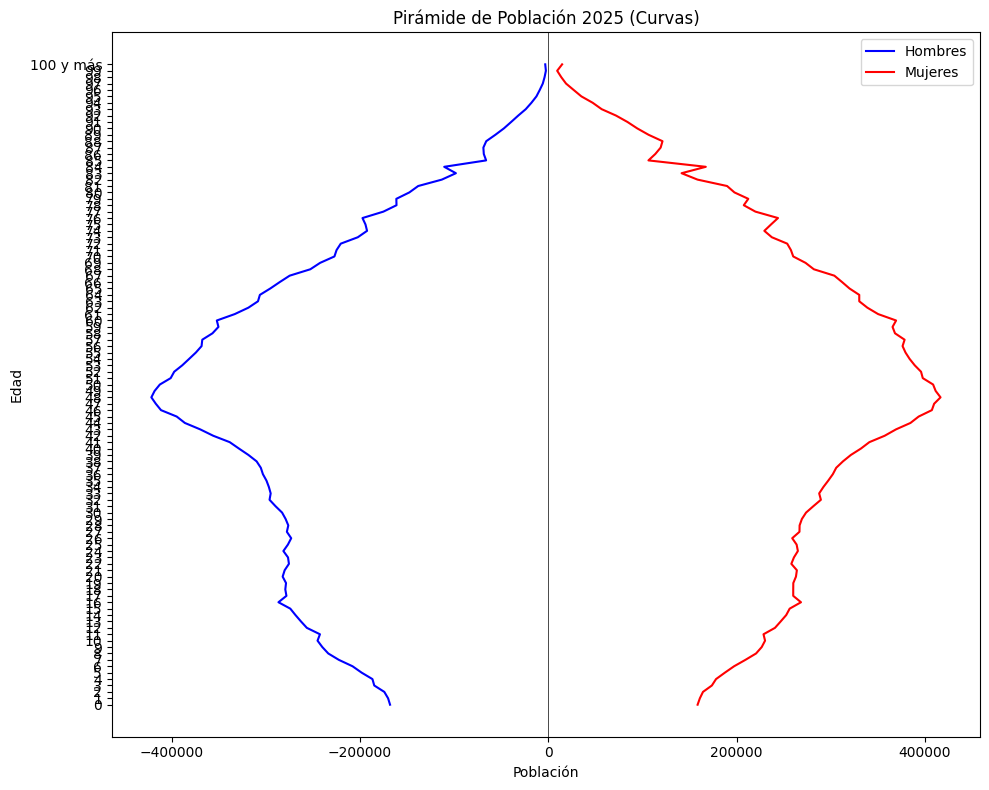

In [7]:

# Extract 2025 data
men_2025 = men_df['2025']
women_2025 = women_df['2025']

# Age groups as they are (youngest to oldest)
ages = men_2025.index
men_values = -men_2025.values  # Negative for left side
women_values = women_2025.values

# Plotting
plt.figure(figsize=(10, 8))

plt.plot(-men_2025.values, ages, color='blue', label='Hombres')   # Negative for left side
plt.plot(women_2025.values, ages, color='red', label='Mujeres')   # Positive for right side

plt.axvline(0, color='black', linewidth=0.5)  # Center line
plt.xlabel('Población')
plt.ylabel('Edad')
plt.title('Pirámide de Población 2025 (Curvas)')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


### Piràmide poblacional 2030


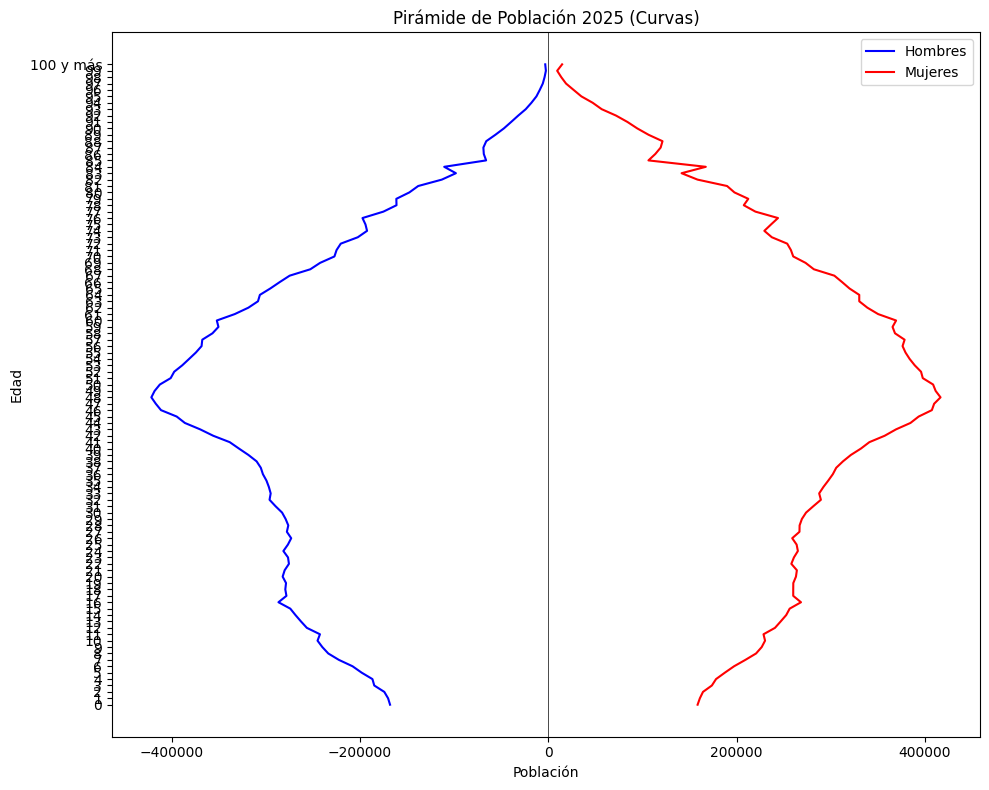

In [8]:
# Extract 2030 data
men_2030 = men_df['2030']
women_2030 = women_df['2030']

# Age groups as they are (youngest to oldest)
ages = men_2030.index
men_values = -men_2030.values  # Negative for left side
women_values = women_2030.values

# Plotting
plt.figure(figsize=(10, 8))

plt.plot(-men_2025.values, ages, color='blue', label='Hombres')   # Negative for left side
plt.plot(women_2025.values, ages, color='red', label='Mujeres')   # Positive for right side

plt.axvline(0, color='black', linewidth=0.5)  # Center line
plt.xlabel('Población')
plt.ylabel('Edad')
plt.title('Pirámide de Población 2025 (Curvas)')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


### Piràmide poblacional 2035


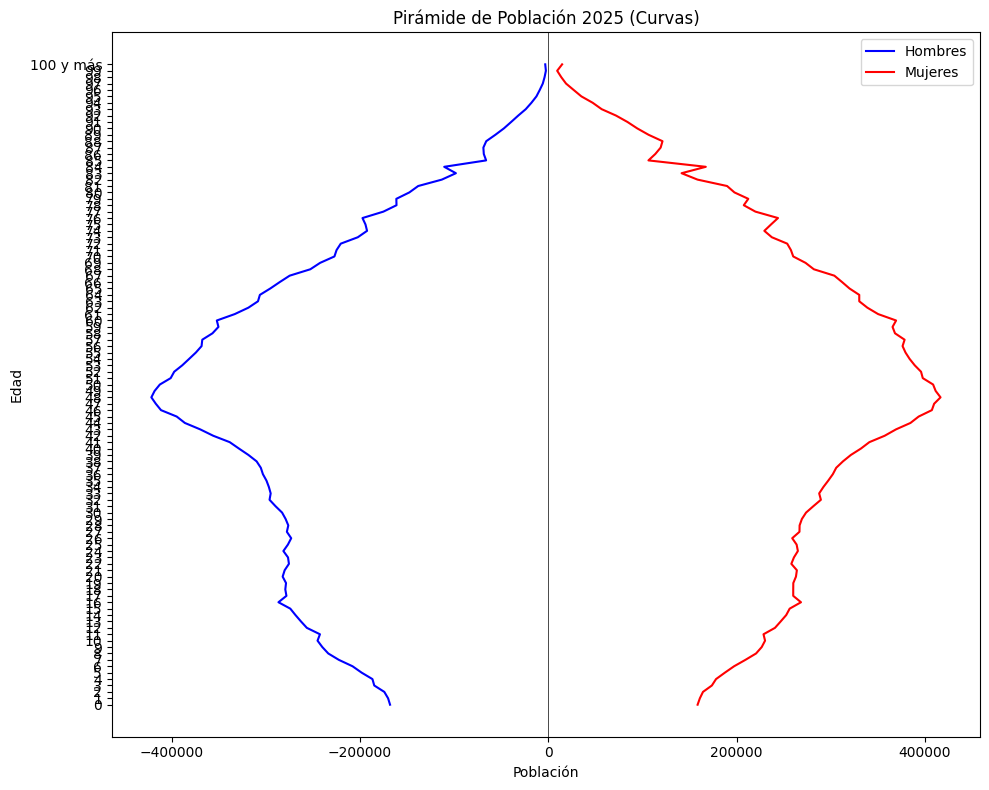

In [9]:
# Extract 2035 data
men_2035 = men_df['2035']
women_2035 = women_df['2035']

# Age groups as they are (youngest to oldest)
ages = men_2035.index
men_values = -men_2035.values  # Negative for left side
women_values = women_2035.values

# Plotting
plt.figure(figsize=(10, 8))

plt.plot(-men_2025.values, ages, color='blue', label='Hombres')   # Negative for left side
plt.plot(women_2025.values, ages, color='red', label='Mujeres')   # Positive for right side

plt.axvline(0, color='black', linewidth=0.5)  # Center line
plt.xlabel('Población')
plt.ylabel('Edad')
plt.title('Pirámide de Población 2025 (Curvas)')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

### Piràmide poblacional conjunta


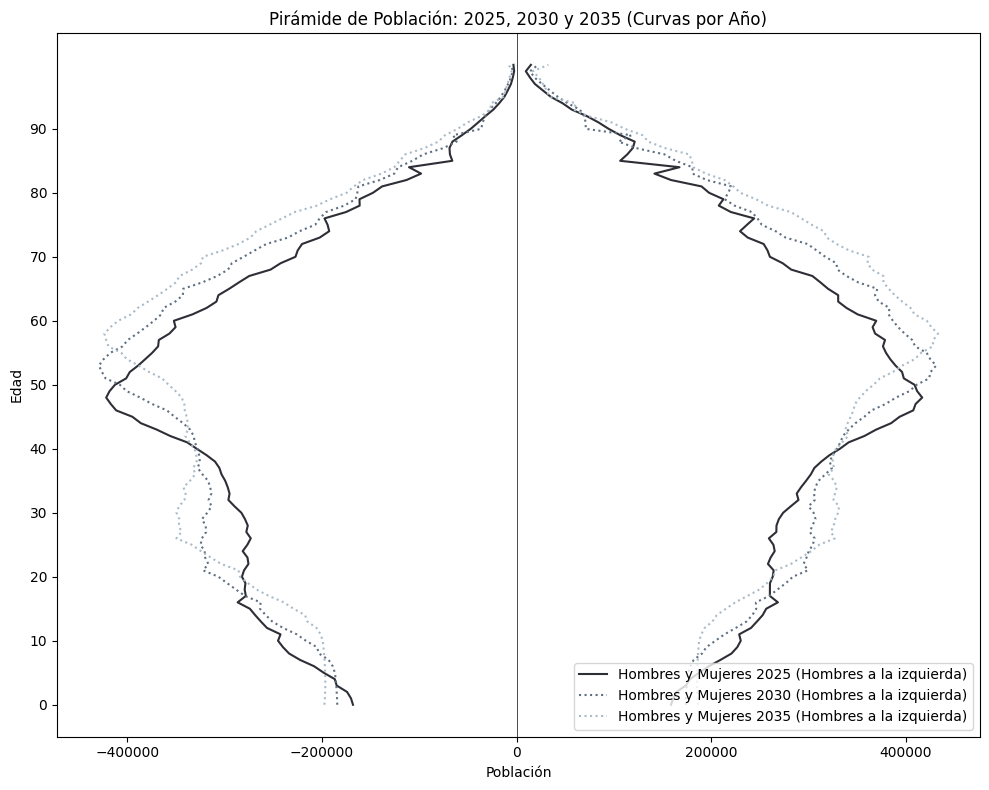

In [10]:

# Custom color palette
custom_palette = [ "#2E2F36", "#5F6F81","#AABBC8", "#2CCED1", "#DCE3EA",]



# Get age groups
ages = men_df.index

# Define years and line styles
years = ['2025', '2030', '2035']
linestyles = ['solid', 'dotted', 'dotted']

# Set up the plot
plt.figure(figsize=(10, 8))

# Plot each year's data
for i, (year, style) in enumerate(zip(years, linestyles)):
    color = custom_palette[i % len(custom_palette)]
    men = -men_df[year].values
    women = women_df[year].values

    plt.plot(men, ages, linestyle=style, color=color, label=f'Hombres y Mujeres {year} (Hombres a la izquierda)')
    plt.plot(women, ages, linestyle=style, color=color)  # Same color for women



# Formatting
plt.axvline(0, color='black', linewidth=0.5)
plt.xlabel('Población')
plt.ylabel('Edad')
plt.title('Pirámide de Población: 2025, 2030 y 2035 (Curvas por Año)')

# Only show ticks every 10 years
age_ticks = [age for age in ages if str(age).isdigit() and int(age) % 10 == 0]
plt.yticks(age_ticks)

plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


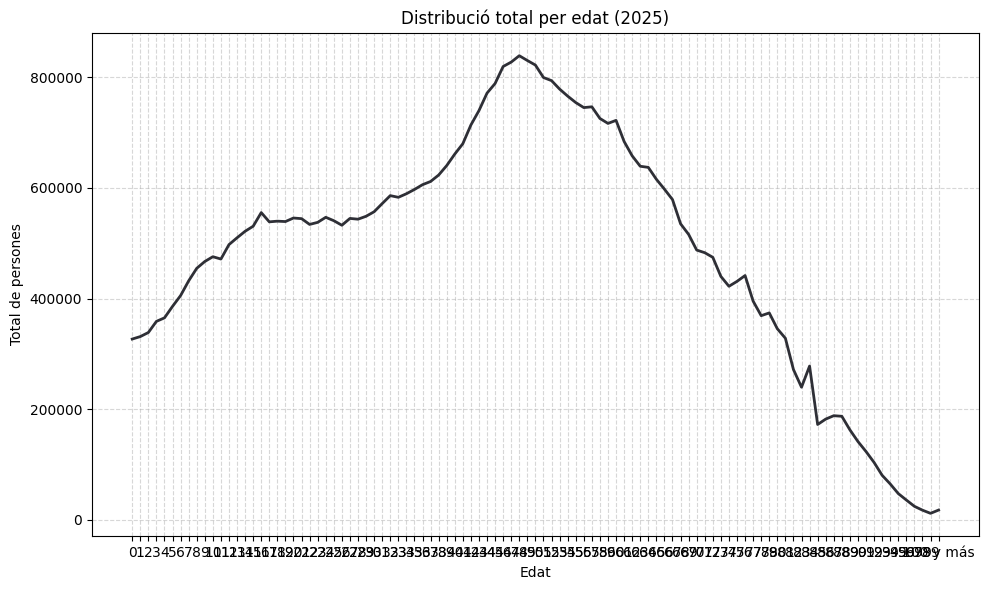

In [ ]:
men_2025 = men_2025.reset_index()
men_2025.columns = ['age', 'men']

women_2025 = women_2025.reset_index()
women_2025.columns = ['age', 'women']


population_2025 = pd.merge(men_2025, women_2025, on='age', how='inner')
population_2025['total'] = population_2025['men'] + population_2025['women']

plt.figure(figsize=(10, 6))
plt.plot(population_2025['age'], population_2025['total'], color="#2E2F36", linewidth=2)
plt.title("Distribució total per edat (2025)")
plt.xlabel("Edat")
plt.ylabel("Total de persones")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
